In [8]:
data_file = open("mnist_dataset/mnist_train_100.txt", 'r')
data_list = data_file.readline()
data_file.close()

In [9]:
len(data_list)

1846

In [10]:
data_list[0]

'5'

In [6]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [ ]:
all_values = data_list

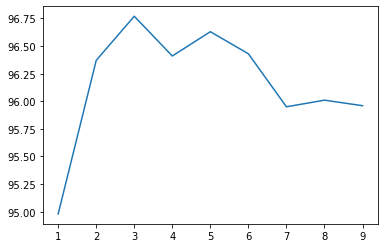

In [13]:
import numpy                    # 행렬 연산 등 외부 모듈 이용
import scipy.special            # 시그모이드 함수 등 외부 모듈 이용
import matplotlib.pyplot as plt # 이미지 출력 imshow 등 외부 모듈 이용
 
class MyNeuralNetwork:
    def __init__(self, inputNodesCnt, hiddenNodesCnt, outputNodesCnt, learningRate):
        self.inputNodesCnt  = inputNodesCnt     # 입력계층 노드 수
        self.hiddenNodesCnt = hiddenNodesCnt    # 은닉계층 노드 수
        self.outputNodesCnt = outputNodesCnt    # 출력계층 노드 수
        self.lr             = learningRate      # 학습률
        
        # numpy.random.normal 첫번째인자(0.0)를 중심, 두번째인자를 너비로하는 정규분포, 세번째인자를 크기로 생성한다.
        # 가중치(입력층 -> 은닉층): wih
        # 행렬 사이즈의 순서를 은닉, 입력 순으로 바꾼 이유는 아래 행렬 내적연산을 자연스럽게 하기 위해서이다.
        self.wih = numpy.random.normal(0.0, pow(self.hiddenNodesCnt, -0.5), (self.hiddenNodesCnt, self.inputNodesCnt))
        # 가중치(은닉층 -> 출력층): who
        self.who = numpy.random.normal(0.0, pow(self.outputNodesCnt, -0.5), (self.outputNodesCnt, self.hiddenNodesCnt))
        # 활성화함수 지정(여기서는 시그모이드함수 이용)
        self.activationFunc = lambda x: scipy.special.expit(x)
        
    # 입력데이터와 정답라벨을 입력받아 학습한다.(마지막에 가중치 업데이트함을 주목하자)
    def train(self, inputsList, targetsList):
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        inputs = numpy.array(inputsList, ndmin=2).T
        
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        # targets는 출력계층 노드 수와 같고, 정답지에는 0.99 그렇지 않은 경우 0.01로 저장됨
        # 정답인 1개만 아주 크고 나머진 아주 작은 one-hot encoding으로 구성되어 있다.
        targets = numpy.array(targetsList, ndmin=2).T
        
        # [은닉계층 노드 수 X 입력계층 노드 수] 행렬과 [입력계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        hiddenOutputs = self.activationFunc(numpy.dot(self.wih, inputs))
        
        # [출력계층 노드 수 X 은닉계층 노드 수] 행렬과 [은닉계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        # 출력계층에는 활성화 함수를 생략하기도 한다.
        hypothesis = self.activationFunc(numpy.dot(self.who, hiddenOutputs))
        
        # 정답과 가정사이에 발생한 오차1(=비용)
        cost = targets - hypothesis        
        # (은닉게층 -> 출력계층) 가중치 업데이트
        self.who += self.lr * numpy.dot((cost * hypothesis * (1.0 - hypothesis)), numpy.transpose(hiddenOutputs))
                
        # 은닉계층 -> 출력계층의 전치와 오차1의 내적을 통해 오차2 계산
        hiddenErrors = numpy.dot(self.who.T, cost)        
        # (입력계층 -> 은닉계층) 가중치 업데이트
        self.wih += self.lr * numpy.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), numpy.transpose(inputs))
    
    # 입력데이터를 신경망에 테스트하여 결과를 얻는다.
    def test(self, inputsList):
        # 가로로된 리스트를 2차원으로 변경하고 세로로 세운다.
        inputs = numpy.array(inputsList, ndmin=2).T
        
        # [은닉계층 노드 수 X 입력계층 노드 수] 행렬과 [입력계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        hiddenOutputs = self.activationFunc(numpy.dot(self.wih, inputs))
        
        # [출력계층 노드 수 X 은닉계층 노드 수] 행렬과 [은닉계층 노드 수 X 1] 행렬의 내적을 구한 후 활성화 함수 호출
        return self.activationFunc(numpy.dot(self.who, hiddenOutputs))
        
# 학습용(traing)데이터와 테스트용(test)데이터를 분리하여 준비
trainingDataFileHandler = open("mnist_dataset/mnist_train.csv","r")
# 학습용데이터를 읽어서 리스트형태로 저장
trainingDataList = trainingDataFileHandler.readlines()
# 학습용데이터 파일 핸들러를 닫는다.
trainingDataFileHandler.close()
 

    
testDataFileHandler = open("mnist_dataset/mnist_test.csv","r")
# 테스트용데이터를 읽어서 리스트형태로 저장
testDataList = testDataFileHandler.readlines()
# 테스트용데이터 파일 핸들러를 닫는다.
testDataFileHandler.close()
 
 
 
        
inputNodesCnt  = 784  # 입력계층 노드 수
hiddenNodesCnt = 100  # 은닉계층 노드 수
outputNodesCnt = 10   # 출력계층 노드 수
 
learningRate = 0.1    # 학습률
 
net = MyNeuralNetwork(inputNodesCnt, hiddenNodesCnt, outputNodesCnt, learningRate)
 
# 현재 스텝을 기록한다.
step = [];
# 현재 스텝의 정확도를 기록한다.
stepPerf = [];
 
for epochs in range(1, 10, 1):
    for e in range(epochs):
        for record in trainingDataList:
            # 한줄의 데이터를 읽어 쉼표를 구분자로 하여 여러 셀에 기록한다.
            cells = record.split(',')
            
            # 색상값이 0~255 사이 숫자이다.
            # 잘 학습할 수 있도록 0은 피하고 큰수를 피하기 위해 0.01 ~ 1.00 사이로 조정한다.
            inputs = (numpy.asfarray(cells[1:])/255.0*0.99) + 0.01
            
            # 정답인 1개만 아주 크고 나머진 아주 작은 one-hot encoding으로 구성되어 있다.
            targets = numpy.zeros(outputNodesCnt) + 0.01
            targets[int(cells[0])] = 0.99
            
            # 학습시킨다.
            net.train(inputs, targets)
            
    resultCard = []
 
    for record in testDataList:
        # 한줄의 데이터를 읽어 쉼표를 구분자로 하여 여러 셀에 기록한다.
        cells = record.split(',')
        # 첫번째 항목은 라벨링된 정답지이다.
        target = int(cells[0])
        
        # 색상값이 0~255 사이 숫자이다.
        # 잘 학습할 수 있도록 0은 피하고 큰수를 피하기 위해 0.01 ~ 1.00 사이로 조정한다.
        inputs = (numpy.asfarray(cells[1:])/255.0 * 0.99) + 0.01
        
        # 테스트 쿼리를 실행한다.
        outputs = net.test(inputs)
        # 배열중 최대값을 가진 인덱스를 반환한느 argmax를 통해 찾은 최대값과 정답지를 비교한다.
        if(numpy.argmax(outputs) == target):
            # 정답이라면 1 표시
            resultCard.append(1)
        else:
            # 오답이라면 0 표시
            resultCard.append(0)
            
    # resultCard 리스트를 배열형태로 변환한 후 평균을 구한다.
    perf = numpy.asarray(resultCard).mean() * 100.0
    
    # 현재 에폭을 step에 저장
    step.append(epochs);
    # 현재 에폭의 결과를 stepPerf에 저장
    stepPerf.append(perf);
    
    
    
plt.plot(step, stepPerf)
plt.show()